# Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os, json
from joblib import dump

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor

# EDA + Preprocessing

In [39]:
df = pd.read_csv("./dataset/data.csv")
df.head()

,Date,HomeTeam,AwayTeam,Elo_H_before,Elo_A_before,GoalsScore_H,GoalsAgainst_H,GoalDifference_H,WinStreak_H,LoseStreak_H,...,WinRate_A,GoalsScore_A_avg,GoalsAgainst_A_avg,H2H_score,H2H_GS_H_total,H2H_GS_A_total,H2H_GS_H_avg,H2H_GS_A_avg,Full Time Home Goals,Full Time Away Goals
0,2004-08-14,Aston Villa,Southampton,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,2,0
1,2004-08-14,Blackburn,West Brom,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,1,1
2,2004-08-14,Bolton,Charlton,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,4,1
3,2004-08-14,Man City,Fulham,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,1,1
4,2004-08-14,Middlesbrough,Newcastle,1500.0,1500.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,2,2


In [40]:
df.describe()

,Elo_H_before,Elo_A_before,GoalsScore_H,GoalsAgainst_H,GoalDifference_H,WinStreak_H,LoseStreak_H,Wins_H,Losses_H,WinRate_H,...,WinRate_A,GoalsScore_A_avg,GoalsAgainst_A_avg,H2H_score,H2H_GS_H_total,H2H_GS_A_total,H2H_GS_H_avg,H2H_GS_A_avg,Full Time Home Goals,Full Time Away Goals
count,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,...,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,1548.411892,1549.286322,6.709023,6.846742,-0.137719,0.611153,0.714160,1.839975,1.905514,0.369179,...,0.385915,1.381044,1.341955,-0.068797,12.619674,12.775313,1.171940,1.226657,1.541729,1.192607
std,95.445156,95.418382,3.318124,3.122907,5.040451,1.125222,1.080365,1.245352,1.222710,0.249508,...,0.249020,0.666302,0.617865,4.889136,14.077163,14.065564,0.744148,0.782429,1.314124,1.166165
min,1351.487658,1347.664214,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1480.479696,1481.322476,4.000000,5.000000,-4.000000,0.000000,0.000000,1.000000,1.000000,0.200000,...,0.200000,1.000000,1.000000,-2.000000,2.000000,3.000000,0.722222,0.764706,1.000000,0.000000
50%,1519.007062,1519.733075,6.000000,7.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.400000,...,0.400000,1.200000,1.200000,0.000000,8.000000,8.000000,1.125000,1.166667,1.000000,1.000000
75%,1613.564688,1614.476271,9.000000,9.000000,3.000000,1.000000,1.000000,3.000000,3.000000,0.600000,...,0.600000,1.800000,1.800000,2.000000,18.000000,18.000000,1.631579,1.666667,2.000000,2.000000
max,1847.302913,1844.700563,29.000000,20.000000,29.000000,5.000000,5.000000,5.000000,5.000000,1.000000,...,1.000000,4.800000,4.600000,24.000000,93.000000,92.000000,5.500000,6.000000,9.000000,9.000000


In [41]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

start_date = pd.Timestamp("2004-08-14")
end_date = pd.Timestamp("2005-05-15")

# Drop mùa đầu tiên
df = df[~((df["Date"] >= start_date) & (df["Date"] <= end_date))].reset_index(drop=True)

/tmp/ipykernel_70549/1591876597.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [42]:
df_overview = []
columns = df.columns
for i in columns: 
    types = df[i].dtypes
    unique_data = df[i].nunique()
                   
    missing_count=df[i].isnull().sum() 
    value_count= df[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df.duplicated().sum()    
    df_overview.append([i, types, unique_data, missing_count, missing_percentage, duplicated])
        
df_info = pd.DataFrame(df_overview)
df_info.columns =["name of column", "types", "unique_data", "missing value", "missing percentage", "duplicated"]

df_info

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,Date,datetime64[ns],2139,0,0.0,0
1,HomeTeam,object,44,0,0.0,0
2,AwayTeam,object,44,0,0.0,0
3,Elo_H_before,float64,7587,0,0.0,0
4,Elo_A_before,float64,7591,0,0.0,0
5,GoalsScore_H,float64,26,0,0.0,0
6,GoalsAgainst_H,float64,21,0,0.0,0
7,GoalDifference_H,float64,41,0,0.0,0
8,WinStreak_H,int64,6,0,0.0,0
9,LoseStreak_H,int64,6,0,0.0,0


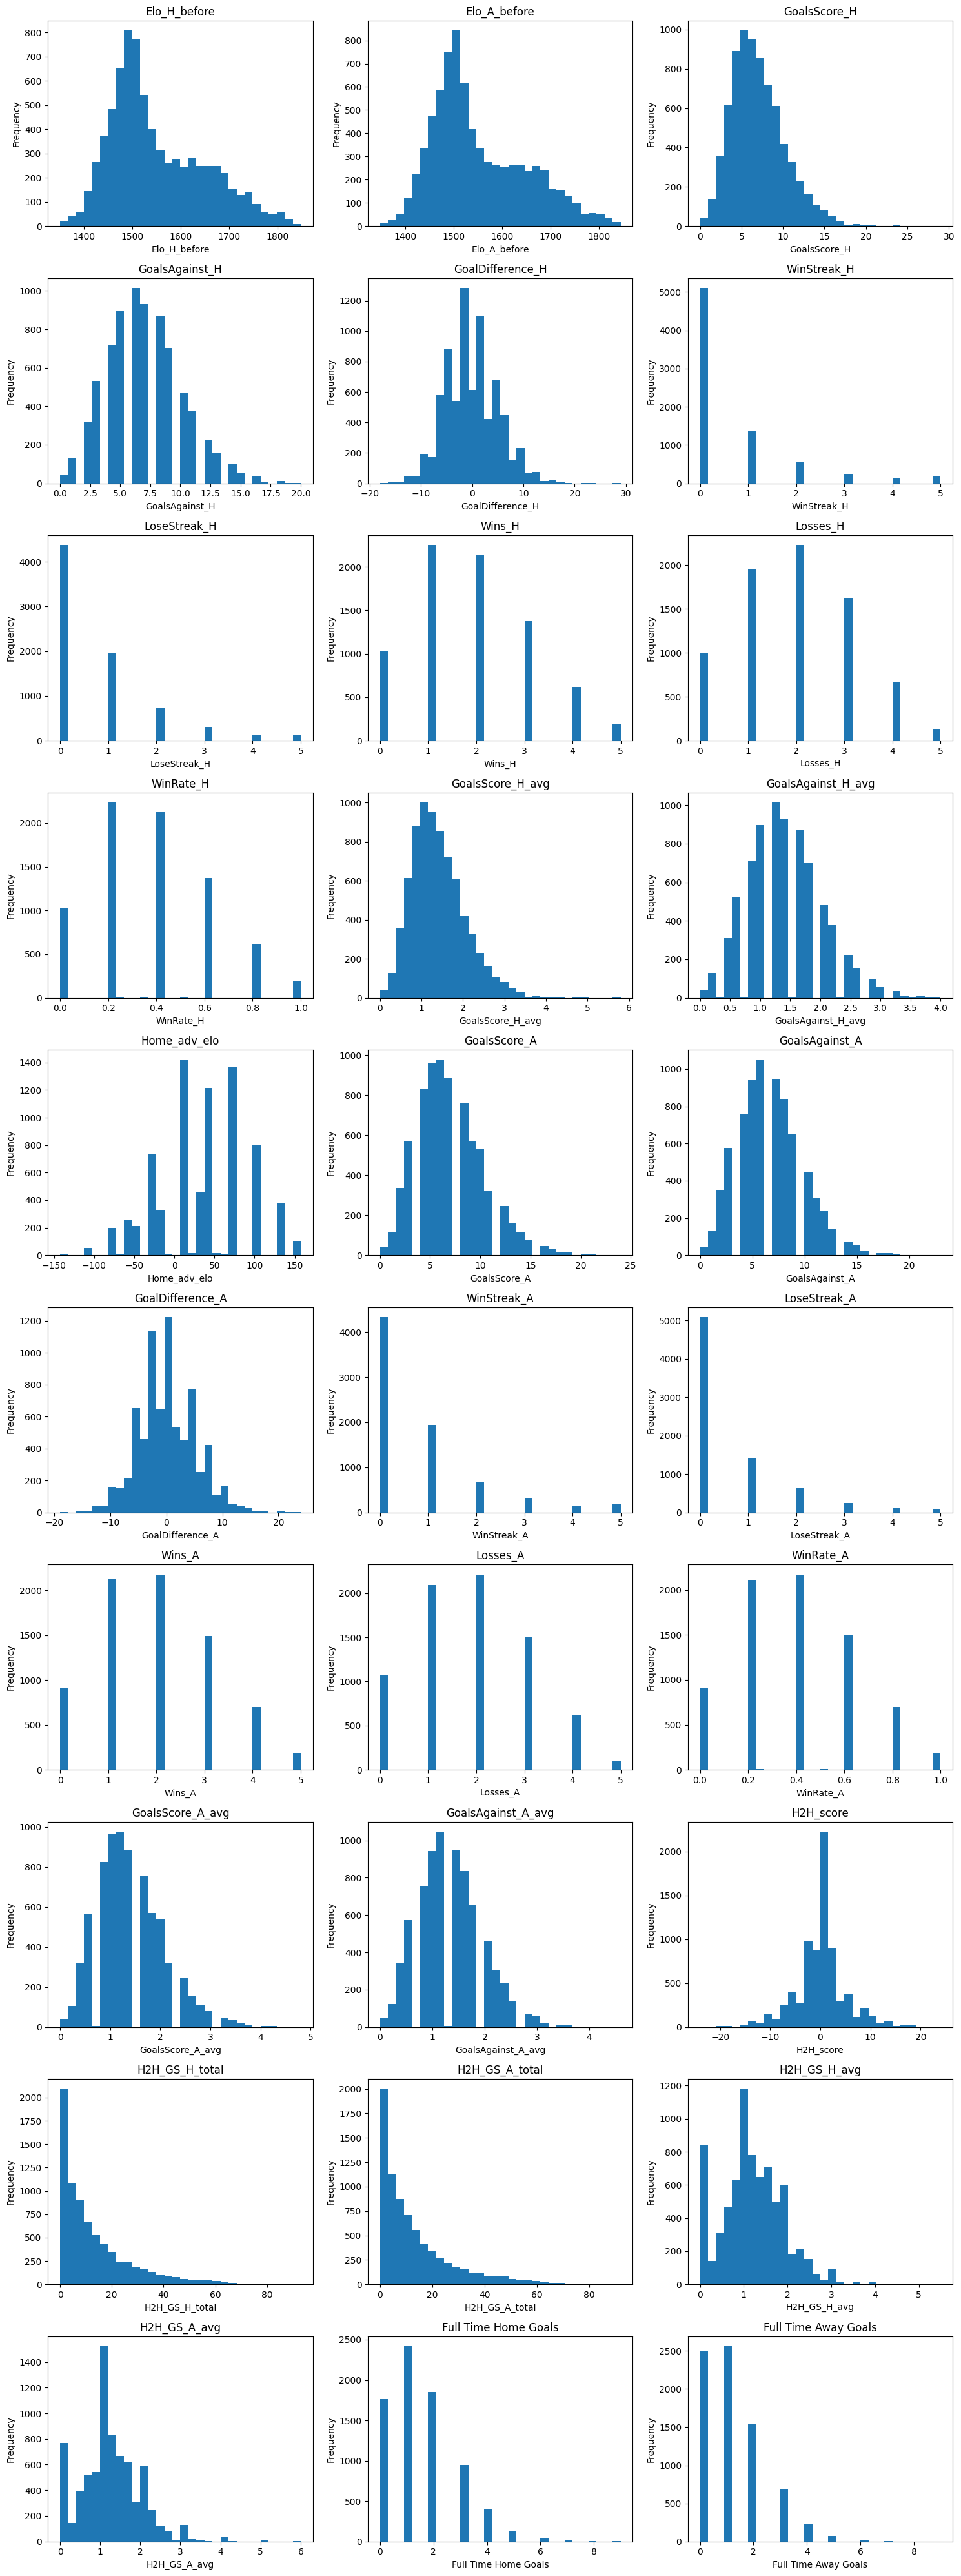

In [43]:
# Hiển thị phân phối của các cột numerical
num_columns = df.select_dtypes(include=["int64", "float64"]).columns
n = len(num_columns)

cols = 3 
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(num_columns):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
def feature_engineering(df):
    df["Elo_diff"] = df["Elo_H_before"] - df["Elo_A_before"]
    df["Elo_ratio"] = df["Elo_H_before"] / df["Elo_A_before"]

    df["Goals_likelyhood_H"] = df["GoalsScore_H_avg"] + df["GoalsAgainst_A_avg"]
    df["Goals_likelyhood_A"] = df["GoalsScore_A_avg"] + df["GoalsAgainst_H_avg"]

    df["Home_adv_elo_sum"] = df["Elo_H_before"] + df["Home_adv_elo"]

    df["Full Time Home Goals"] = df.pop("Full Time Home Goals")
    df["Full Time Away Goals"] = df.pop("Full Time Away Goals")

    return df

df = feature_engineering(df)

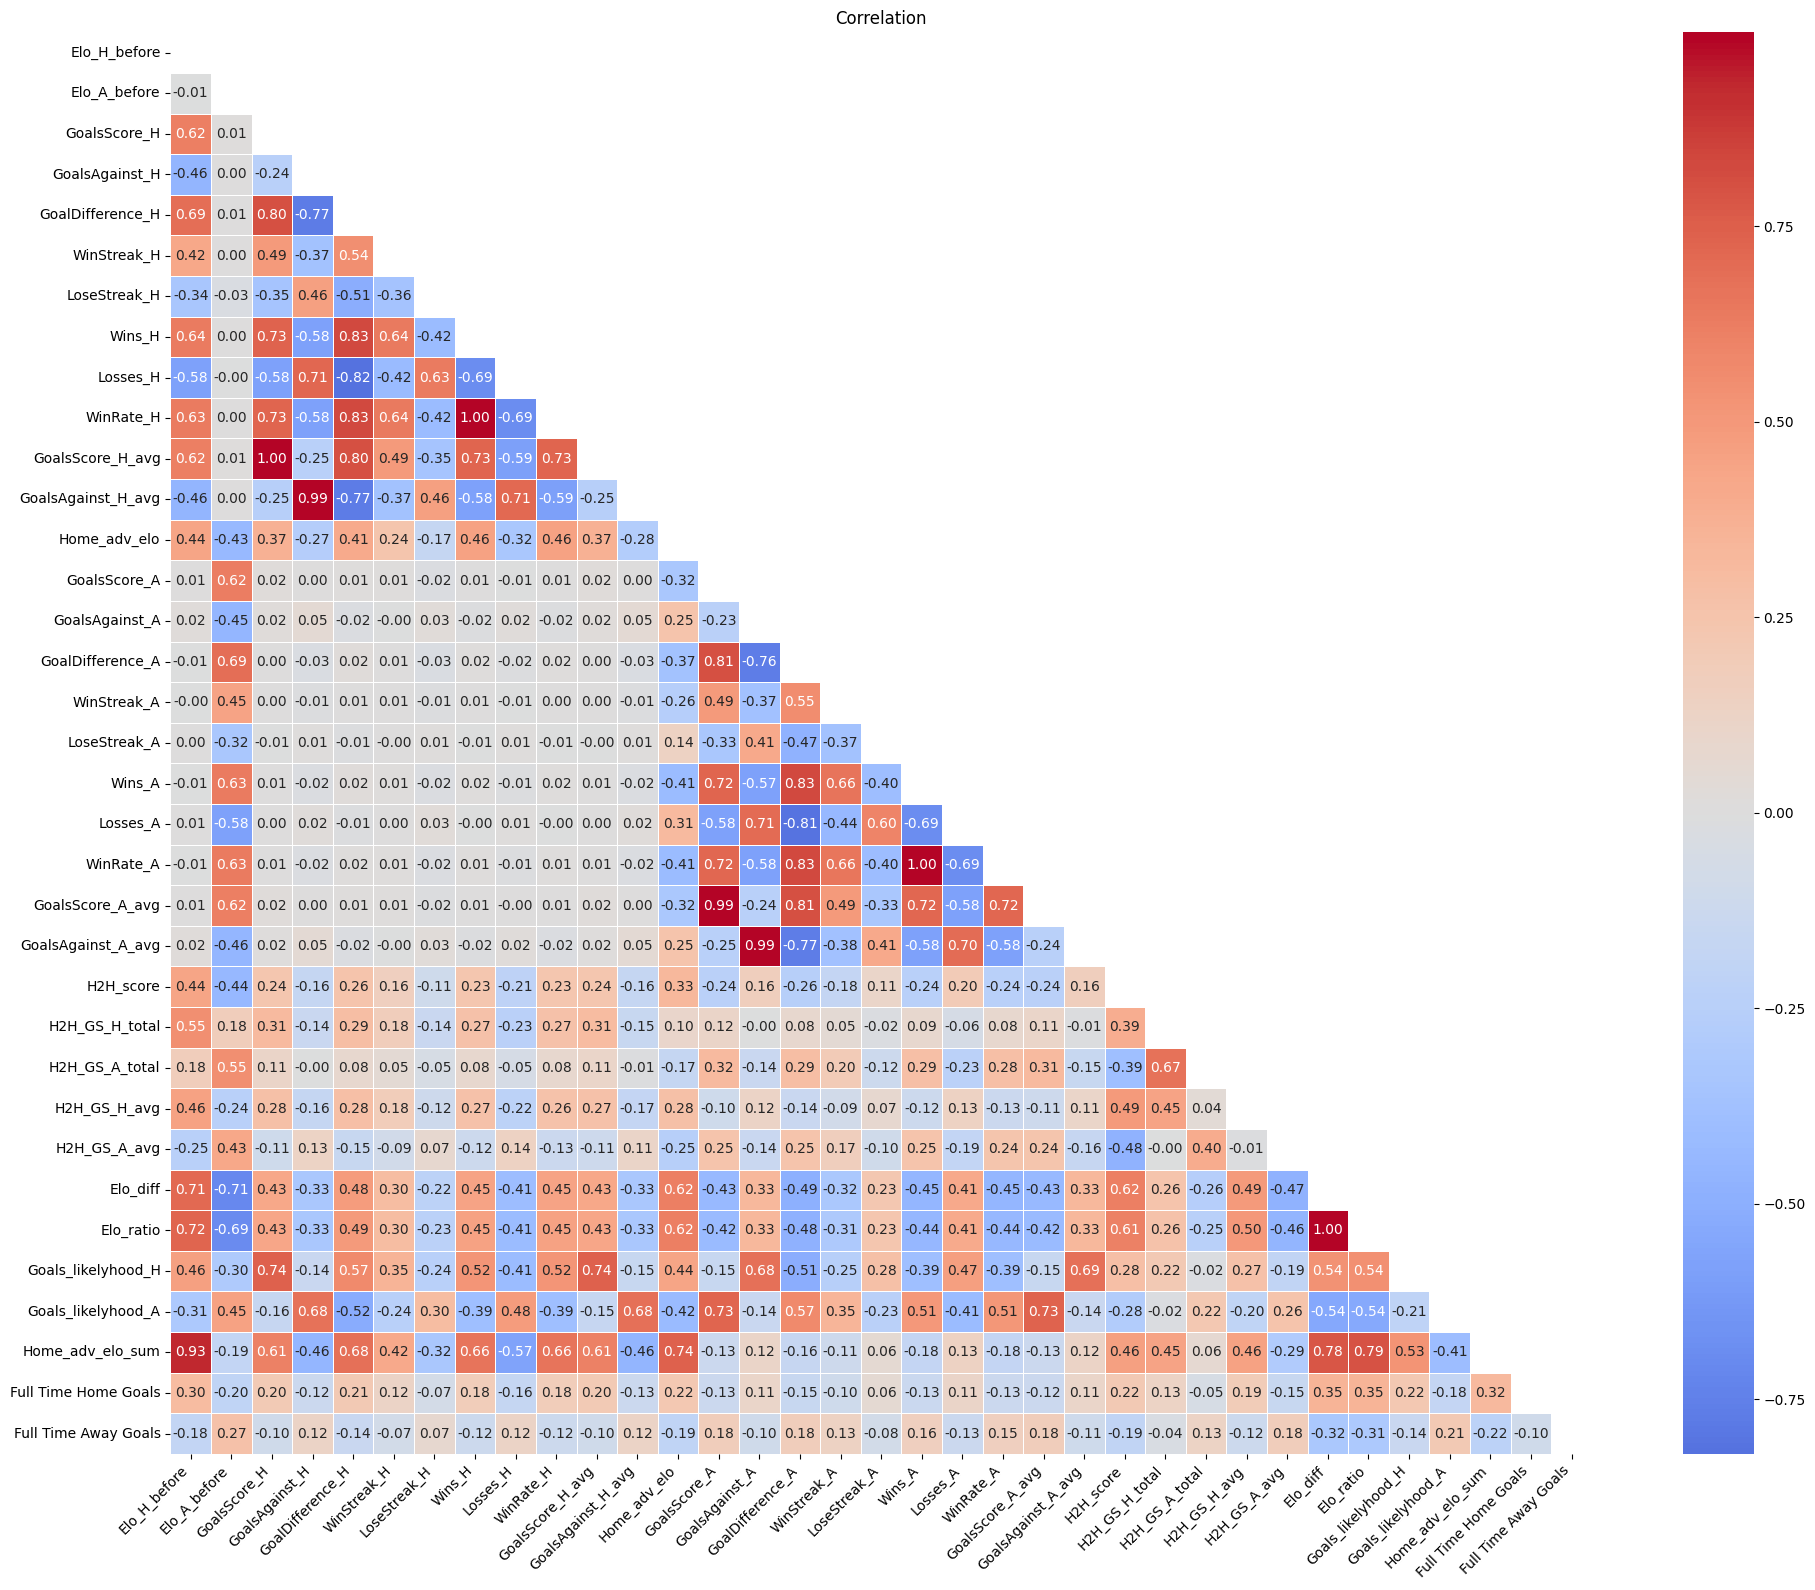

In [45]:
corr = df.corr(numeric_only=True)
thr = 0.0

mask_thr = (np.abs(corr) <= thr)
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=0)
mask = mask_thr | mask_upper

plt.figure(figsize=(20, 16))
ax = sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, square=True, linewidths=0.5
)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title(f"Correlation")
plt.tight_layout()
#plt.savefig("correlation_heatmap_base.png", dpi=300, bbox_inches="tight")
plt.show()

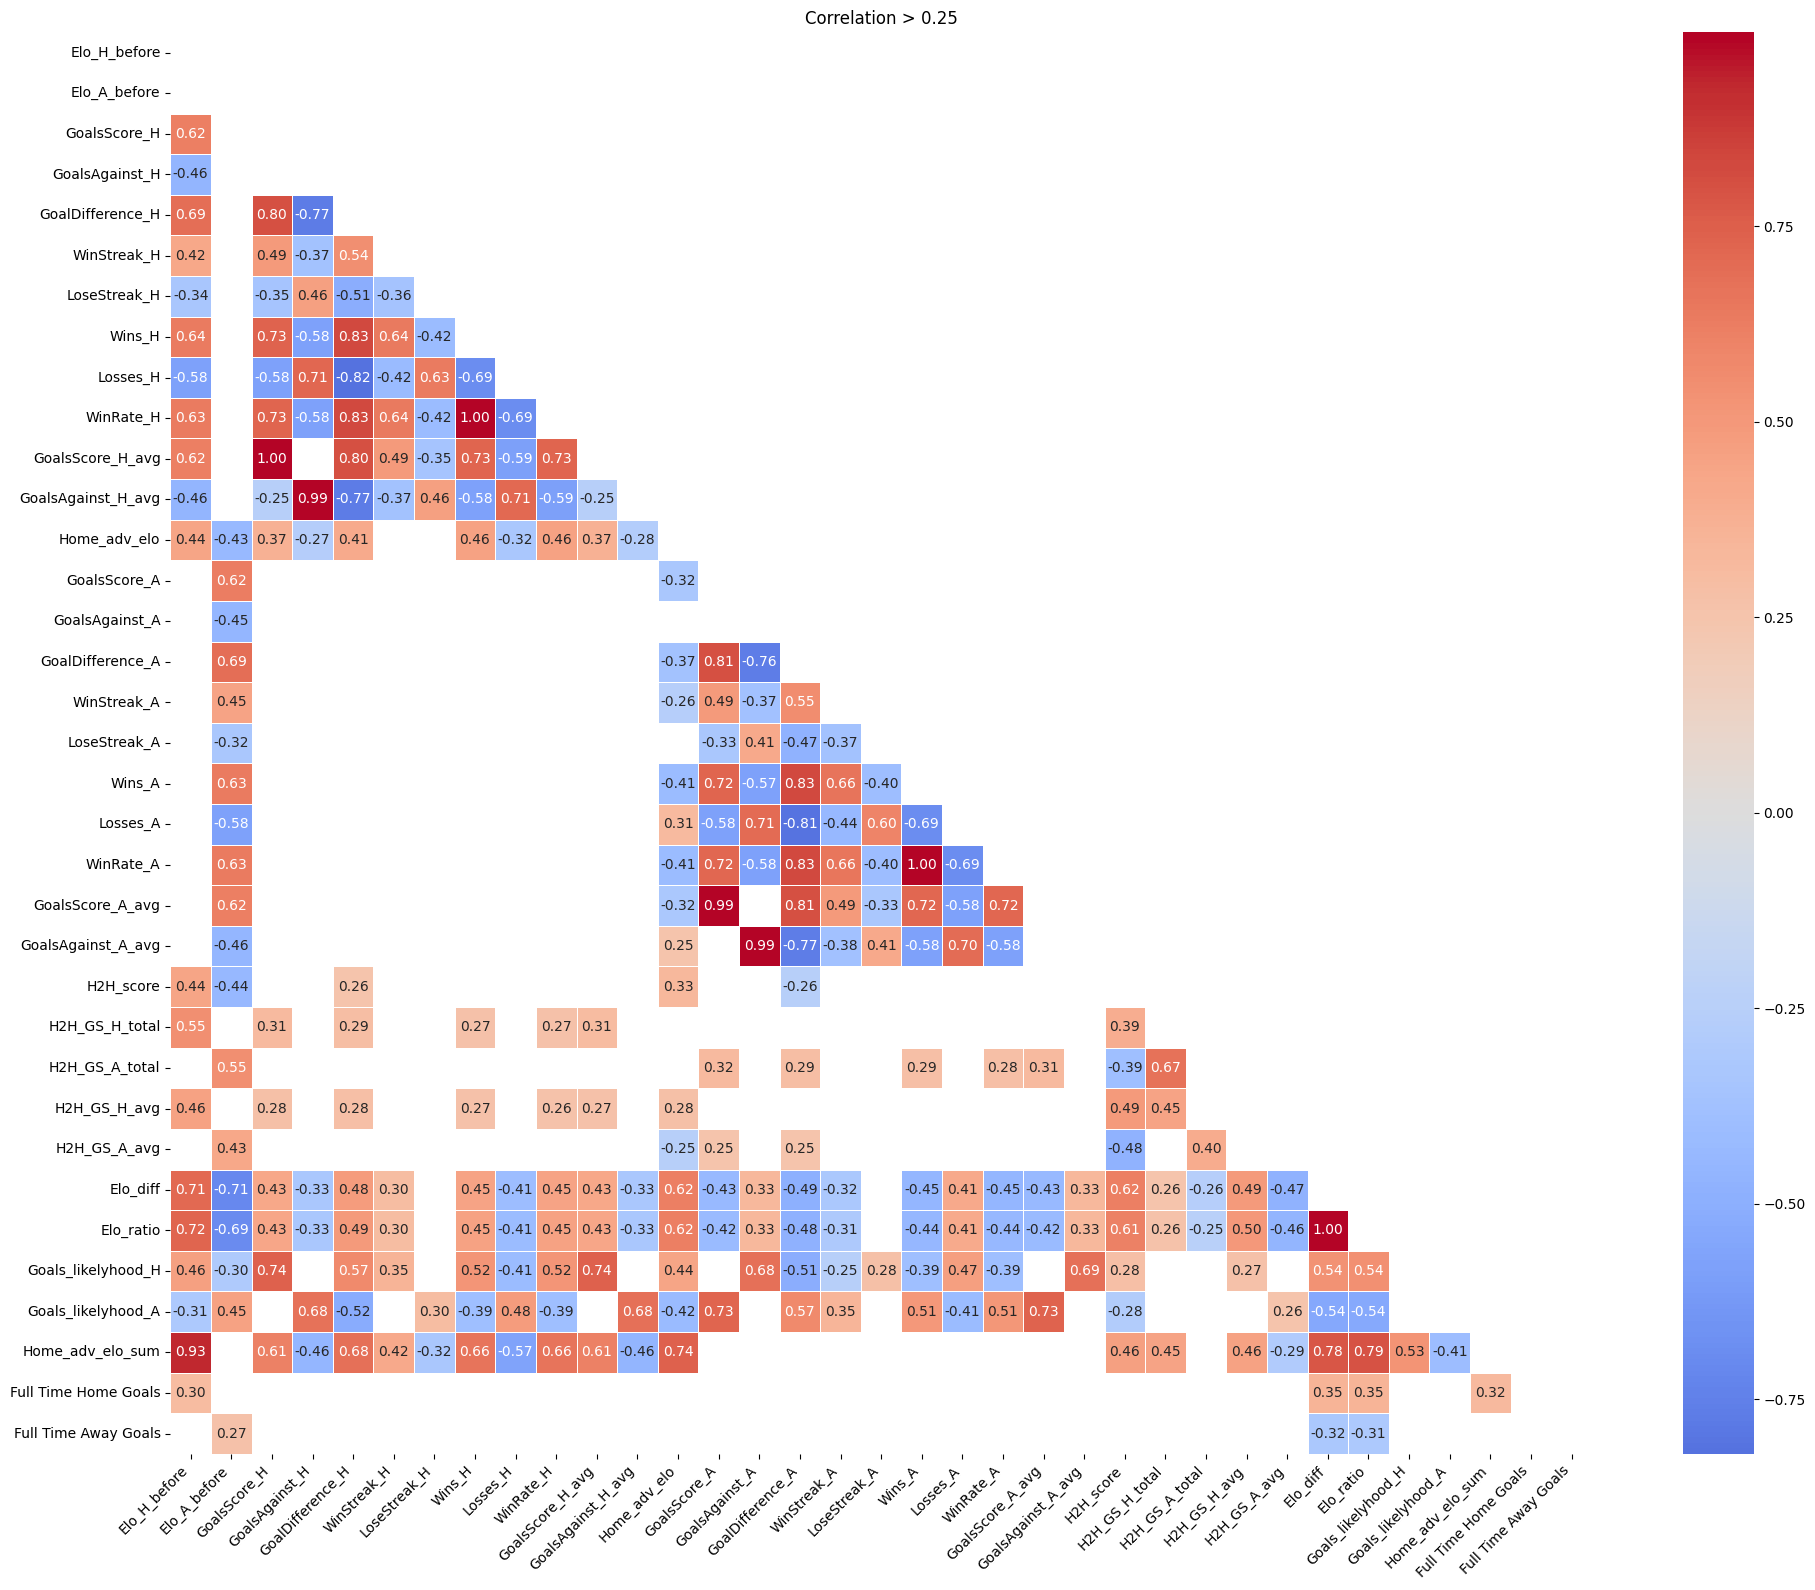

In [46]:
corr = df.corr(numeric_only=True)
thr = 0.25

mask_thr = (np.abs(corr) <= thr)
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=0)
mask = mask_thr | mask_upper

plt.figure(figsize=(20, 16))
ax = sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, square=True, linewidths=0.5
)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title(f"Correlation > {thr}")
plt.tight_layout()
#plt.savefig(f"correlation_heatmap_min_{thr}.png", dpi=300, bbox_inches="tight")
plt.show()

In [47]:
# Lọc để lấy các features có corr >= ngưỡng threshold
thr = 0
corr_home = corr["Full Time Home Goals"].abs()
corr_away = corr["Full Time Away Goals"].abs()

keep_num_features = corr_home[corr_home >= thr].index.union(
    corr_away[corr_away >= thr].index
)

# Lấy các cột object
object_cols = df.select_dtypes(include=["object", "datetime64[ns]"]).columns
keep_features = keep_num_features.union(object_cols)

# Lọc dataframe
df_filtered = df[keep_features]

In [48]:
exclude = ["Full Time Home Goals", "Full Time Away Goals"]

cols_to_norm = df_filtered.select_dtypes(include=['int64', 'float64']).columns.difference(exclude)

scaler = StandardScaler()
df_filtered[cols_to_norm] = scaler.fit_transform(df_filtered[cols_to_norm])

In [49]:
team_cols = ["HomeTeam", "AwayTeam"]

le = LabelEncoder()
all_teams = pd.concat([df_filtered[column] for column in team_cols]).unique()
le.fit(all_teams)
for col in team_cols:
    df_filtered[col + "_code"] = le.transform(df_filtered[col])

In [50]:

df_filtered["Full Time Home Goals"] = df_filtered.pop("Full Time Home Goals")
df_filtered["Full Time Away Goals"] = df_filtered.pop("Full Time Away Goals")

In [51]:
df_filtered.head()

,AwayTeam,Date,Elo_A_before,Elo_H_before,Elo_diff,Elo_ratio,GoalDifference_A,GoalDifference_H,GoalsAgainst_A,GoalsAgainst_A_avg,...,WinRate_A,WinRate_H,WinStreak_A,WinStreak_H,Wins_A,Wins_H,HomeTeam_code,AwayTeam_code,Full Time Home Goals,Full Time Away Goals
0,Liverpool,2005-08-13,-0.413155,-0.367033,0.032397,-0.009799,-0.239441,1.012189,0.094925,0.084990,...,0.050968,0.116152,0.212082,-0.544408,0.055248,0.118730,26,22,0,0
1,Blackburn,2005-08-13,-0.662075,-0.525322,0.096157,0.058017,-0.636983,0.027242,-0.231367,-0.240385,...,-1.558261,-1.491289,-0.656825,-0.544408,-1.556585,-1.489734,41,3,3,1
2,Charlton,2005-08-13,-1.051095,-0.525322,0.369953,0.357332,-1.233295,0.027242,0.421218,0.410365,...,-1.558261,-1.491289,-0.656825,-0.544408,-1.556585,-1.489734,36,11,1,3
3,Tottenham,2005-08-13,-0.485207,-1.036285,-0.388036,-0.448928,0.356872,-0.366738,-0.883952,-0.891136,...,-0.753646,-0.687569,-0.656825,-0.544408,-0.750669,-0.685502,30,38,0,2
4,Man United,2005-08-13,0.338894,-0.556960,-0.630609,-0.668863,0.754414,-1.548675,-0.231367,-0.240385,...,0.855582,-0.687569,0.212082,-0.544408,0.861164,-0.685502,15,25,0,2


In [52]:
X = df_filtered.drop(columns=["HomeTeam", "AwayTeam", "Full Time Home Goals", "Full Time Away Goals"])
y_home = df_filtered["Full Time Home Goals"]
y_away = df_filtered["Full Time Away Goals"]

In [53]:
# Tạo Train, Valid, Test theo mùa
test_start  = pd.Timestamp("2024-08-16")
valid_start = pd.Timestamp("2023-08-11")
valid_end   = test_start 

mask_test  = df_filtered["Date"] >= test_start
mask_valid = (df_filtered["Date"] >= valid_start) & (df_filtered["Date"] < valid_end)
mask_train = ~(mask_test | mask_valid)

X_train = X.loc[mask_train]
X_valid = X.loc[mask_valid]
X_test = X.loc[mask_test]

y_home_train = y_home.loc[mask_train]
y_home_valid = y_home.loc[mask_valid]
y_home_test = y_home.loc[mask_test]

y_away_train = y_away.loc[mask_train]
y_away_valid = y_away.loc[mask_valid]
y_away_test = y_away.loc[mask_test]

X_train = X_train.drop(columns=["Date"])
X_valid = X_valid.drop(columns=["Date"])
X_test = X_test.drop(columns=["Date"])

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_home_train.shape, y_home_valid.shape, y_home_test.shape)
print(y_away_train.shape, y_away_valid.shape, y_away_test.shape)

(6840, 35) (380, 35) (380, 35)
(6840,) (380,) (380,)
(6840,) (380,) (380,)


# Models

## MLP

In [54]:
# Khai báo biến cho mô hình MLP
x_train_mlp = X_train.copy()
y_home_train_mlp = y_home_train.copy()
y_away_train_mlp = y_away_train.copy()

x_valid_mlp = X_valid.copy()
y_home_valid_mlp = y_home_valid.copy()
y_away_valid_mlp = y_away_valid.copy()

x_test_mlp = X_test.copy()
y_home_test_mlp = y_home_test.copy()
y_away_test_mlp = y_away_test.copy()

In [55]:
df_overview = []
columns = x_train_mlp.columns
for i in columns: 
    types = df_filtered[i].dtypes
    unique_data = df_filtered[i].nunique()
                   
    missing_count=df_filtered[i].isnull().sum() 
    value_count= df_filtered[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df_filtered.duplicated().sum()    
    df_overview.append([i, types, unique_data, missing_count, missing_percentage, duplicated])
        
df_info = pd.DataFrame(df_overview)
df_info.columns =["name of column", "types", "unique_data", "missing value", "missing percentage", "duplicated"]

df_info

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,Elo_A_before,float64,7591,0,0.0,0
1,Elo_H_before,float64,7587,0,0.0,0
2,Elo_diff,float64,7600,0,0.0,0
3,Elo_ratio,float64,7600,0,0.0,0
4,GoalDifference_A,float64,40,0,0.0,0
5,GoalDifference_H,float64,41,0,0.0,0
6,GoalsAgainst_A,float64,22,0,0.0,0
7,GoalsAgainst_A_avg,float64,35,0,0.0,0
8,GoalsAgainst_H,float64,21,0,0.0,0
9,GoalsAgainst_H_avg,float64,31,0,0.0,0


In [56]:
mlp_home = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_away = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_home.fit(x_train_mlp, y_home_train_mlp)
mlp_away.fit(x_train_mlp, y_away_train_mlp)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(256, 128, 64, 32),
             max_iter=2000, random_state=42)

In [57]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train_mlp, mlp_home.predict(x_train_mlp))
rmse_home_valid = rmse(y_home_valid_mlp, mlp_home.predict(x_valid_mlp))
rmse_home_test  = rmse(y_home_test_mlp,  mlp_home.predict(x_test_mlp))

rmse_away_train = rmse(y_away_train_mlp, mlp_away.predict(x_train_mlp))
rmse_away_valid = rmse(y_away_valid_mlp, mlp_away.predict(x_valid_mlp))
rmse_away_test  = rmse(y_away_test_mlp,  mlp_away.predict(x_test_mlp))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(mlp_home.predict(x_train_mlp)).astype(int)
y_home_pred_valid = np.rint(mlp_home.predict(x_valid_mlp)).astype(int)
y_home_pred_test  = np.rint(mlp_home.predict(x_test_mlp)).astype(int)

qwk_home_train = qwk(y_home_train_mlp, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid_mlp, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test_mlp,  y_home_pred_test)

# --- AWAY ---
y_away_pred_train = np.rint(mlp_away.predict(x_train_mlp)).astype(int)
y_away_pred_valid = np.rint(mlp_away.predict(x_valid_mlp)).astype(int)
y_away_pred_test  = np.rint(mlp_away.predict(x_test_mlp)).astype(int)

qwk_away_train = qwk(y_away_train_mlp, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid_mlp, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test_mlp,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(mlp_home.predict(x_train_mlp)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(mlp_home.predict(x_valid_mlp)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(mlp_home.predict(x_test_mlp)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(mlp_away.predict(x_train_mlp)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(mlp_away.predict(x_valid_mlp)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(mlp_away.predict(x_test_mlp)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train_mlp.to_numpy(), y_away_train_mlp.to_numpy())
true_res_valid = goals_to_result(y_home_valid_mlp.to_numpy(), y_away_valid_mlp.to_numpy())
true_res_test  = goals_to_result(y_home_test_mlp.to_numpy(),  y_away_test_mlp.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.1633
Valid: 1.3149
Test : 1.2623
=== RMSE Away Goals ===
Train: 1.0842
Valid: 1.2053
Test : 1.1624
=== QWK Home Goals ===
Train: 0.3437
Valid: 0.2151
Test : 0.2047
=== QWK Away Goals ===
Train: 0.2050
Valid: 0.2176
Test : 0.1947
=== Match Result Accuracy ===
Train: 0.5135
Valid: 0.5237
Test : 0.4605


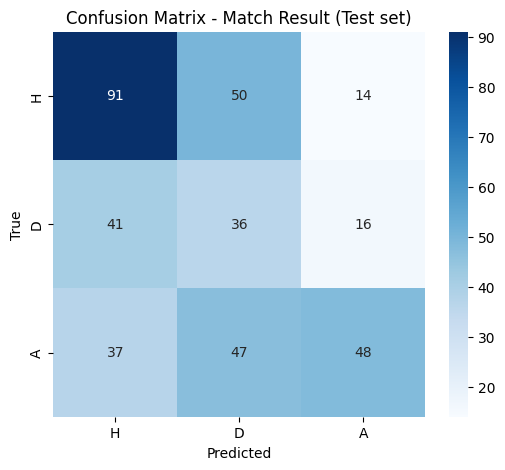

In [58]:
# Tính confusion matrix cho tập test
labels = ["H", "D", "A"]
cm = confusion_matrix(true_res_test, pred_res_test, labels=labels)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Match Result (Test set)")
plt.show()

In [59]:
def build_team_map(df_full, X_part):
    meta = df_full.loc[X_part.index, ["HomeTeam", "AwayTeam"]].copy()
    meta["HomeTeam_code"] = X_part["HomeTeam_code"].values
    meta["AwayTeam_code"] = X_part["AwayTeam_code"].values

    home_map = meta[["HomeTeam_code","HomeTeam"]].drop_duplicates().set_index("HomeTeam_code")["HomeTeam"].to_dict()
    away_map = meta[["AwayTeam_code","AwayTeam"]].drop_duplicates().set_index("AwayTeam_code")["AwayTeam"].to_dict()

    both_map = {}
    both_map.update(home_map)
    both_map.update(away_map)
    return both_map

team_map_all = build_team_map(df, X)

def make_split_frame(X_split, true_res, pred_res):
    out = pd.DataFrame(index=X_split.index)
    out["HomeTeam_code"] = X_split["HomeTeam_code"].astype(int)
    out["AwayTeam_code"] = X_split["AwayTeam_code"].astype(int)
    out["HomeTeam"] = out["HomeTeam_code"].map(team_map_all)
    out["AwayTeam"] = out["AwayTeam_code"].map(team_map_all)
    out["True"] = true_res
    out["Pred"] = pred_res
    return out

def overall_acc_by_team(df_res):
    both = pd.concat([
        df_res[["HomeTeam","True","Pred"]].rename(columns={"HomeTeam":"Team"}),
        df_res[["AwayTeam","True","Pred"]].rename(columns={"AwayTeam":"Team"})
    ], axis=0)

    acc_table = both.groupby("Team").apply(lambda g: accuracy_score(g["True"], g["Pred"]))
    acc_table = acc_table.reset_index(name="Overall_Accuracy")
    acc_table["Matches"] = both.groupby("Team").size().values
    acc_table = acc_table.sort_values("Overall_Accuracy", ascending=False).reset_index(drop=True)
    return acc_table

In [60]:
# Gom dữ liệu của split valid
df_train_res = make_split_frame(X_train, true_res_train, pred_res_train)

# Tính overall accuracy theo team cho valid
acc_train_table = overall_acc_by_team(df_train_res)

print("Overall Accuracy by Team (Train)")
acc_train_table

Overall Accuracy by Team (Train)


,Team,Overall_Accuracy,Matches
0,Derby,0.710526,38
1,Arsenal,0.625731,684
2,Man United,0.619883,684
3,Man City,0.597953,684
4,Chelsea,0.589181,684
5,Tottenham,0.565789,684
6,QPR,0.561404,114
7,Liverpool,0.555556,684
8,Cardiff,0.552632,76
9,Blackburn,0.541353,266


In [61]:
# Gom dữ liệu của split valid
df_valid_res = make_split_frame(X_valid, true_res_valid, pred_res_valid)

# Tính overall accuracy theo team cho valid
acc_valid_table = overall_acc_by_team(df_valid_res)

print("Overall Accuracy by Team (Valid)")
acc_valid_table

Overall Accuracy by Team (Valid)


,Team,Overall_Accuracy,Matches
0,Man City,0.710526,38
1,Arsenal,0.684211,38
2,Nott'm Forest,0.684211,38
3,Sheffield United,0.657895,38
4,Luton,0.605263,38
5,Tottenham,0.605263,38
6,Liverpool,0.605263,38
7,Burnley,0.552632,38
8,Brentford,0.552632,38
9,Crystal Palace,0.500000,38


In [62]:
df_test_res = make_split_frame(X_test, true_res_test, pred_res_test)

acc_test_table = overall_acc_by_team(df_test_res)

print("Overall Accuracy by Team (Test)")
acc_test_table

Overall Accuracy by Team (Test)


,Team,Overall_Accuracy,Matches
0,Southampton,0.789474,38
1,Newcastle,0.631579,38
2,Liverpool,0.631579,38
3,Man City,0.605263,38
4,Chelsea,0.526316,38
5,Wolves,0.500000,38
6,Ipswich,0.500000,38
7,Man United,0.473684,38
8,Arsenal,0.473684,38
9,Leicester,0.473684,38


## Poisson Regressor

In [63]:
# Khai báo biến cho mô hình
x_train = X_train.copy()
y_home_train = y_home_train.copy()
y_away_train = y_away_train.copy()

x_valid = X_valid.copy()
y_home_valid = y_home_valid.copy()
y_away_valid = y_away_valid.copy()

x_test = X_test.copy()
y_home_test = y_home_test.copy()
y_away_test = y_away_test.copy()

In [64]:
import optuna
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = PoissonRegressor(alpha=alpha, max_iter=max_iter)

    # Dùng cross-validation để đánh giá RMSE
    scores = cross_val_score(
        model,
        x_train,
        y_home_train,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    return -np.mean(scores) 

# Tạo study và chạy
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train model tốt nhất
best_poisson_home = PoissonRegressor(**study.best_params)
best_poisson_home.fit(x_train, y_home_train)


[I 2025-08-14 10:22:08,723] A new study created in memory with name: no-name-8cb69fdd-3995-46f7-9f06-9291af7ba468
/tmp/ipykernel_70549/890046884.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
[I 2025-08-14 10:22:09,812] Trial 0 finished with value: 1.2317997480575331 and parameters: {'alpha': 0.0074593432857265485, 'max_iter': 1000}. Best is trial 0 with value: 1.2317997480575331.
[I 2025-08-14 10:22:10,485] Trial 1 finished with value: 1.2297577421559067 and parameters: {'alpha': 0.4570563099801455, 'max_iter': 600}. Best is trial 1 with value: 1.2297577421559067.
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

Best params: {'alpha': 0.3532319716148596, 'max_iter': 1000}
Best RMSE: 1.2297206117464858


PoissonRegressor(alpha=0.3532319716148596, max_iter=1000)

In [65]:
import optuna
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Hàm objective cho Optuna
def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = PoissonRegressor(alpha=alpha, max_iter=max_iter)

    # Dùng cross-validation để đánh giá RMSE
    scores = cross_val_score(
        model,
        x_train,
        y_away_train,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    return -np.mean(scores)  # Optuna cần minimize, RMSE nhỏ hơn thì tốt hơn

# Tạo study và chạy
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50) 

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train model tốt nhất
best_poisson_away = PoissonRegressor(**study.best_params)
best_poisson_away.fit(x_train, y_away_train)


[I 2025-08-14 10:22:23,028] A new study created in memory with name: no-name-ffb0fcf0-86a1-45c2-897b-4f6b27626eb8
/tmp/ipykernel_70549/2971878529.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-4, 10)  # dò alpha theo log scale
[I 2025-08-14 10:22:23,265] Trial 0 finished with value: 1.0963483715290863 and parameters: {'alpha': 0.0074593432857265485, 'max_iter': 1000}. Best is trial 0 with value: 1.0963483715290863.
[I 2025-08-14 10:22:23,410] Trial 1 finished with value: 1.0969598549613684 and parameters: {'alpha': 0.4570563099801455, 'max_iter': 600}. Best is trial 0 with value: 1.0963483715290863.
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATI

Best params: {'alpha': 0.08769061319244367, 'max_iter': 500}
Best RMSE: 1.0958106007468915


PoissonRegressor(alpha=0.08769061319244367, max_iter=500)

In [66]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_poisson_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_poisson_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_poisson_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_poisson_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_poisson_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_poisson_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_poisson_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_poisson_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_poisson_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_poisson_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_poisson_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_poisson_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_poisson_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_poisson_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_poisson_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_poisson_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_poisson_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_poisson_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2244
Valid: 1.2720
Test : 1.2168
=== RMSE Away Goals ===
Train: 1.0925
Valid: 1.1999
Test : 1.1469
=== QWK Home Goals ===
Train: 0.2362
Valid: 0.2541
Test : 0.2251
=== QWK Away Goals ===
Train: 0.1614
Valid: 0.2146
Test : 0.1826
=== Match Result Accuracy ===
Train: 0.4841
Valid: 0.5289
Test : 0.4763


## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()

ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [300, 500, 1000]
}

ridge_gs_home = GridSearchCV(
    ridge,
    ridge_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_gs_home.fit(x_train, y_home_train)

print("Best params (Home):", ridge_gs_home.best_params_)
print("Best RMSE (Home):", -ridge_gs_home.best_score_)

best_ridge_home = ridge_gs_home.best_estimator_
best_ridge_home.fit(x_train, y_home_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params (Home): {'alpha': 100, 'max_iter': 300}
Best RMSE (Home): 1.2311473869438312


Ridge(alpha=100, max_iter=300)

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()

ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [300, 500, 1000]
}

ridge_gs_away = GridSearchCV(
    ridge,
    ridge_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_gs_away.fit(x_train, y_away_train)

print("Best params (Away):", ridge_gs_away.best_params_)
print("Best RMSE (Away):", -ridge_gs_away.best_score_)

best_ridge_away = ridge_gs_away.best_estimator_
best_ridge_away.fit(x_train, y_away_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params (Away): {'alpha': 0.1, 'max_iter': 300}
Best RMSE (Away): 1.0981228066028623


Ridge(alpha=0.1, max_iter=300)

In [69]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_ridge_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_ridge_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_ridge_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_ridge_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_ridge_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_ridge_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_ridge_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_ridge_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_ridge_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_ridge_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_ridge_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_ridge_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_ridge_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_ridge_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_ridge_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_ridge_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_ridge_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_ridge_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2241
Valid: 1.2701
Test : 1.2105
=== RMSE Away Goals ===
Train: 1.0923
Valid: 1.2041
Test : 1.1522
=== QWK Home Goals ===
Train: 0.2303
Valid: 0.2575
Test : 0.2438
=== QWK Away Goals ===
Train: 0.1748
Valid: 0.2182
Test : 0.1883
=== Match Result Accuracy ===
Train: 0.4931
Valid: 0.5316
Test : 0.4842


## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Linear Regression
linear = LinearRegression()

linear_params = {
    "fit_intercept": [True, False],
    "positive": [False, True]
}

linear_gs_home = GridSearchCV(
    linear,
    linear_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

linear_gs_home.fit(x_train, y_home_train)

print("Best params (Home):", linear_gs_home.best_params_)
print("Best RMSE (Home):", -linear_gs_home.best_score_)

best_linear_home = linear_gs_home.best_estimator_
best_linear_home.fit(x_train, y_home_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params (Home): {'fit_intercept': True, 'positive': True}
Best RMSE (Home): 1.2293597109506729


LinearRegression(positive=True)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Linear Regression
linear = LinearRegression()

linear_params = {
    "fit_intercept": [True, False],
    "positive": [False, True]
}

linear_gs_away = GridSearchCV(
    linear,
    linear_params,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

linear_gs_away.fit(x_train, y_away_train)

print("Best params (Away):", linear_gs_away.best_params_)
print("Best RMSE (Away):", -linear_gs_away.best_score_)

best_linear_away = linear_gs_away.best_estimator_
best_linear_away.fit(x_train, y_away_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params (Away): {'fit_intercept': True, 'positive': False}
Best RMSE (Away): 1.098188565017605


LinearRegression()

In [72]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_linear_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_linear_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_linear_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_linear_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_linear_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_linear_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_linear_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_linear_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_linear_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_linear_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_linear_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_linear_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_linear_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_linear_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_linear_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_linear_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_linear_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_linear_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.2256
Valid: 1.2666
Test : 1.2082
=== RMSE Away Goals ===
Train: 1.0923
Valid: 1.2039
Test : 1.1524
=== QWK Home Goals ===
Train: 0.2289
Valid: 0.2700
Test : 0.2250
=== QWK Away Goals ===
Train: 0.1758
Valid: 0.2182
Test : 0.1883
=== Match Result Accuracy ===
Train: 0.4917
Valid: 0.5316
Test : 0.4789


## XGBoost

In [73]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Hàm objective cho Optuna
def objective(trial):
    params = {
        "objective": "count:poisson",  # Poisson regression
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, x_train, y_home_train, cv=5, scoring="neg_root_mean_squared_error")
    return -np.mean(scores)  # RMSE

# Tạo study và chạy tối ưu
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train mô hình tốt nhất
best_xgb_home = XGBRegressor(**study.best_params)
best_xgb_home.fit(x_train, y_home_train)


[I 2025-08-14 10:22:39,544] A new study created in memory with name: no-name-cf10adfe-eba3-472f-9059-5139a1867e0d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-14 10:23:11,115] Trial 0 finished with value: 1.4488938012669599 and parameters: {'n_estimators': 637, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 2.5348407664333426e-07, 'reg_lambda': 3.3323645788192616e-08}. Best is trial 0 with value: 1.4488938012669599.
[I 2025-08-14 10:23:28,732] Trial 1 finished with value: 1.3879793826030717 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.31044435499483225, 'reg_lambda': 8.148018307012941e-07}. Best is trial 1 with value: 1.3879793826030717.
[I 2025-08-14 10:23:31,831] Trial 2 finished with value: 1.240023993168249 and parameters: {'n_estimators': 463, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 4.17890272377219e-06

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7452987560704578, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.016723691031496984,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=363, n_jobs=None,
             num_parallel_tree=None, ...)

In [74]:
# Hàm objective cho Optuna
def objective(trial):
    params = {
        "objective": "count:poisson",  # Poisson regression
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, x_train, y_away_train, cv=5, scoring="neg_root_mean_squared_error")
    return -np.mean(scores)  # RMSE

# Tạo study và chạy tối ưu
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

# Train mô hình tốt nhất
best_xgb_away = XGBRegressor(**study.best_params)
best_xgb_away.fit(x_train, y_away_train)

[I 2025-08-14 10:26:43,454] A new study created in memory with name: no-name-b93a70fe-91b4-49ec-b906-1c218e60a47b


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-14 10:26:59,428] Trial 0 finished with value: 1.302164063758322 and parameters: {'n_estimators': 637, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 2.5348407664333426e-07, 'reg_lambda': 3.3323645788192616e-08}. Best is trial 0 with value: 1.302164063758322.
[I 2025-08-14 10:27:11,708] Trial 1 finished with value: 1.2408907438622545 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.31044435499483225, 'reg_lambda': 8.148018307012941e-07}. Best is trial 1 with value: 1.2408907438622545.
[I 2025-08-14 10:27:13,613] Trial 2 finished with value: 1.1067518833183554 and parameters: {'n_estimators': 463, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 4.17890272377219e-06,

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6846610506047419, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.011946725204573709,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=481, n_jobs=None,
             num_parallel_tree=None, ...)

In [75]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_home_train = rmse(y_home_train, best_xgb_home.predict(x_train))
rmse_home_valid = rmse(y_home_valid, best_xgb_home.predict(x_valid))
rmse_home_test  = rmse(y_home_test,  best_xgb_home.predict(x_test))

rmse_away_train = rmse(y_away_train, best_xgb_away.predict(x_train))
rmse_away_valid = rmse(y_away_valid, best_xgb_away.predict(x_valid))
rmse_away_test  = rmse(y_away_test,  best_xgb_away.predict(x_test))

print("=== RMSE Home Goals ===")
print(f"Train: {rmse_home_train:.4f}")
print(f"Valid: {rmse_home_valid:.4f}")
print(f"Test : {rmse_home_test:.4f}")

print("=== RMSE Away Goals ===")
print(f"Train: {rmse_away_train:.4f}")
print(f"Valid: {rmse_away_valid:.4f}")
print(f"Test : {rmse_away_test:.4f}")

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

y_home_pred_train = np.rint(best_xgb_home.predict(x_train)).astype(int)
y_home_pred_valid = np.rint(best_xgb_home.predict(x_valid)).astype(int)
y_home_pred_test  = np.rint(best_xgb_home.predict(x_test)).astype(int)

qwk_home_train = qwk(y_home_train, y_home_pred_train)
qwk_home_valid = qwk(y_home_valid, y_home_pred_valid)
qwk_home_test  = qwk(y_home_test,  y_home_pred_test)

# AWAY
y_away_pred_train = np.rint(best_xgb_away.predict(x_train)).astype(int)
y_away_pred_valid = np.rint(best_xgb_away.predict(x_valid)).astype(int)
y_away_pred_test  = np.rint(best_xgb_away.predict(x_test)).astype(int)

qwk_away_train = qwk(y_away_train, y_away_pred_train)
qwk_away_valid = qwk(y_away_valid, y_away_pred_valid)
qwk_away_test  = qwk(y_away_test,  y_away_pred_test)

# In kết quả
print("=== QWK Home Goals ===")
print(f"Train: {qwk_home_train:.4f}")
print(f"Valid: {qwk_home_valid:.4f}")
print(f"Test : {qwk_home_test:.4f}")

print("=== QWK Away Goals ===")
print(f"Train: {qwk_away_train:.4f}")
print(f"Valid: {qwk_away_valid:.4f}")
print(f"Test : {qwk_away_test:.4f}")

pred_home_train = np.clip(np.rint(best_xgb_home.predict(x_train)), 0, 9).astype(int)
pred_home_valid = np.clip(np.rint(best_xgb_home.predict(x_valid)), 0, 9).astype(int)
pred_home_test  = np.clip(np.rint(best_xgb_home.predict(x_test)),  0, 9).astype(int)

pred_away_train = np.clip(np.rint(best_xgb_away.predict(x_train)), 0, 9).astype(int)
pred_away_valid = np.clip(np.rint(best_xgb_away.predict(x_valid)), 0, 9).astype(int)
pred_away_test  = np.clip(np.rint(best_xgb_away.predict(x_test)),  0, 9).astype(int)

# Suy ra kết quả H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

pred_res_train = goals_to_result(pred_home_train, pred_away_train)
pred_res_valid = goals_to_result(pred_home_valid, pred_away_valid)
pred_res_test  = goals_to_result(pred_home_test,  pred_away_test)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test  = goals_to_result(y_home_test.to_numpy(),  y_away_test.to_numpy())

# Accuracy
acc_train = accuracy_score(true_res_train, pred_res_train)
acc_valid = accuracy_score(true_res_valid, pred_res_valid)
acc_test  = accuracy_score(true_res_test,  pred_res_test)

print("=== Match Result Accuracy ===")
print(f"Train: {acc_train:.4f}")
print(f"Valid: {acc_valid:.4f}")
print(f"Test : {acc_test:.4f}")

=== RMSE Home Goals ===
Train: 1.1764
Valid: 1.2875
Test : 1.2341
=== RMSE Away Goals ===
Train: 1.0551
Valid: 1.2161
Test : 1.1509
=== QWK Home Goals ===
Train: 0.2953
Valid: 0.2447
Test : 0.2519
=== QWK Away Goals ===
Train: 0.2298
Valid: 0.2190
Test : 0.1837
=== Match Result Accuracy ===
Train: 0.5066
Valid: 0.5342
Test : 0.4921


## RandomForest

In [76]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler

def objective_rf(trial, x_train, y_train, x_valid, y_valid):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42,
        'n_jobs': -1
    }
    
    rf = RandomForestRegressor(**params)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    return rmse

# Sampler TPE giúp hội tụ nhanh
sampler = TPESampler(n_startup_trials=10)

# Optimize Home Goals
study_home = optuna.create_study(direction='minimize', sampler=sampler)
study_home.optimize(
    lambda trial: objective_rf(trial, x_train, y_home_train, x_valid, y_home_valid),
    n_trials=40,
    n_jobs=-1  # Chạy nhiều trial song song
)

# Optimize Away Goals
study_away = optuna.create_study(direction='minimize', sampler=sampler)
study_away.optimize(
    lambda trial: objective_rf(trial, x_train, y_away_train, x_valid, y_away_valid),
    n_trials=40,
    n_jobs=-1
)

# Kết quả
print("Best Home Params:", study_home.best_params)
print(f"Best Home RMSE: {study_home.best_value:.4f}")
print("\nBest Away Params:", study_away.best_params)
print(f"Best Away RMSE: {study_away.best_value:.4f}")

[I 2025-08-14 10:30:25,346] A new study created in memory with name: no-name-2945e2c3-b448-412d-9836-7da692e885be
[I 2025-08-14 10:30:28,867] Trial 0 finished with value: 1.2838075969153626 and parameters: {'n_estimators': 74, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 1.2838075969153626.
[I 2025-08-14 10:30:29,026] Trial 12 finished with value: 1.293753935027724 and parameters: {'n_estimators': 87, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 1.2838075969153626.
[I 2025-08-14 10:30:29,067] Trial 3 finished with value: 1.2868456948842242 and parameters: {'n_estimators': 92, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 1.2838075969153626.
[I 2025-08-14 10:30:29,117] Trial 2 finished with value: 1.2879599141293898 and parameters: {'n_estimators': 91, 'max_depth': 15, 'min_s

Best Home Params: {'n_estimators': 232, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Home RMSE: 1.2792

Best Away Params: {'n_estimators': 296, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Away RMSE: 1.2093


In [77]:
# Home Goals model
rf_home = RandomForestRegressor(**study_home.best_params, random_state=42)
rf_home.fit(x_train, y_home_train)

# Away Goals model
rf_away = RandomForestRegressor(**study_away.best_params, random_state=42)
rf_away.fit(x_train, y_away_train)
feature_importance_home = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_home.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Away Goals model
rf_away = RandomForestRegressor(**study_away.best_params, random_state=42, n_jobs=-1)
rf_away.fit(x_train, y_away_train)

feature_importance_away = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_away.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)
# 5. Dự đoán trên tất cả datasets
pred_home_train_rf = rf_home.predict(x_train)
pred_home_valid_rf = rf_home.predict(x_valid)
pred_home_test_rf = rf_home.predict(x_test)

pred_away_train_rf = rf_away.predict(x_train)
pred_away_valid_rf = rf_away.predict(x_valid)
pred_away_test_rf = rf_away.predict(x_test)

In [78]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_rf = rmse(y_home_train, pred_home_train_rf)
rmse_home_valid_rf = rmse(y_home_valid, pred_home_valid_rf)
rmse_home_test_rf = rmse(y_home_test, pred_home_test_rf)

rmse_away_train_rf = rmse(y_away_train, pred_away_train_rf)
rmse_away_valid_rf = rmse(y_away_valid, pred_away_valid_rf)
rmse_away_test_rf = rmse(y_away_test, pred_away_test_rf)

print("=== RMSE Home Goals (Random Forest) ===")
print(f"Train: {rmse_home_train_rf:.4f}")
print(f"Valid: {rmse_home_valid_rf:.4f}")
print(f"Test : {rmse_home_test_rf:.4f}")

print("=== RMSE Away Goals (Random Forest) ===")
print(f"Train: {rmse_away_train_rf:.4f}")
print(f"Valid: {rmse_away_valid_rf:.4f}")
print(f"Test : {rmse_away_test_rf:.4f}")

# QWK
y_home_pred_train_rf = np.rint(pred_home_train_rf).astype(int)
y_home_pred_valid_rf = np.rint(pred_home_valid_rf).astype(int)
y_home_pred_test_rf = np.rint(pred_home_test_rf).astype(int)

y_away_pred_train_rf = np.rint(pred_away_train_rf).astype(int)
y_away_pred_valid_rf = np.rint(pred_away_valid_rf).astype(int)
y_away_pred_test_rf = np.rint(pred_away_test_rf).astype(int)

qwk_home_train_rf = qwk(y_home_train, y_home_pred_train_rf)
qwk_home_valid_rf = qwk(y_home_valid, y_home_pred_valid_rf)
qwk_home_test_rf = qwk(y_home_test, y_home_pred_test_rf)

qwk_away_train_rf = qwk(y_away_train, y_away_pred_train_rf)
qwk_away_valid_rf = qwk(y_away_valid, y_away_pred_valid_rf)
qwk_away_test_rf = qwk(y_away_test, y_away_pred_test_rf)

print("=== QWK Home Goals (Random Forest) ===")
print(f"Train: {qwk_home_train_rf:.4f}")
print(f"Valid: {qwk_home_valid_rf:.4f}")
print(f"Test : {qwk_home_test_rf:.4f}")

print("=== QWK Away Goals (Random Forest) ===")
print(f"Train: {qwk_away_train_rf:.4f}")
print(f"Valid: {qwk_away_valid_rf:.4f}")
print(f"Test : {qwk_away_test_rf:.4f}")

# 7. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_rf_clip = np.clip(pred_home_train_rf, 0, 9)
pred_home_valid_rf_clip = np.clip(pred_home_valid_rf, 0, 9)
pred_home_test_rf_clip = np.clip(pred_home_test_rf, 0, 9)

pred_away_train_rf_clip = np.clip(pred_away_train_rf, 0, 9)
pred_away_valid_rf_clip = np.clip(pred_away_valid_rf, 0, 9)
pred_away_test_rf_clip = np.clip(pred_away_test_rf, 0, 9)

pred_res_train_rf = goals_to_result(pred_home_train_rf_clip, pred_away_train_rf_clip)
pred_res_valid_rf = goals_to_result(pred_home_valid_rf_clip, pred_away_valid_rf_clip)
pred_res_test_rf = goals_to_result(pred_home_test_rf_clip, pred_away_test_rf_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_rf = accuracy_score(true_res_train, pred_res_train_rf)
acc_valid_rf = accuracy_score(true_res_valid, pred_res_valid_rf)
acc_test_rf = accuracy_score(true_res_test, pred_res_test_rf)

print("=== Match Result Accuracy (Random Forest) ===")
print(f"Train: {acc_train_rf:.4f}")
print(f"Valid: {acc_valid_rf:.4f}")
print(f"Test : {acc_test_rf:.4f}")

=== RMSE Home Goals (Random Forest) ===
Train: 0.9066
Valid: 1.2792
Test : 1.2215
=== RMSE Away Goals (Random Forest) ===
Train: 0.8854
Valid: 1.2093
Test : 1.1456
=== QWK Home Goals (Random Forest) ===
Train: 0.5938
Valid: 0.2527
Test : 0.2178
=== QWK Away Goals (Random Forest) ===
Train: 0.4044
Valid: 0.1976
Test : 0.1717
=== Match Result Accuracy (Random Forest) ===
Train: 0.6326
Valid: 0.5947
Test : 0.5026


## SVR

In [79]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import optuna
import numpy as np
import time

# 1. Scale features trước
scaler_svr = StandardScaler()
X_train_scaled = scaler_svr.fit_transform(x_train)
X_valid_scaled = scaler_svr.transform(x_valid)
X_test_scaled = scaler_svr.transform(x_test)

# 2. Lấy subset train & valid để tăng tốc
def fast_subset(X, y, sample_size=500):
    if len(X) > sample_size:
        idx = np.random.choice(len(X), sample_size, replace=False)
        return X[idx], y.iloc[idx]
    return X, y

X_train_fast, y_home_train_fast = fast_subset(X_train_scaled, y_home_train, 500)
_, y_away_train_fast = fast_subset(X_train_scaled, y_away_train, 500)

X_valid_fast, y_home_valid_fast = fast_subset(X_valid_scaled, y_home_valid, 150)
_, y_away_valid_fast = fast_subset(X_valid_scaled, y_away_valid, 150)

# 3. Objective chung cho Home/Away
def objective_svr(trial, X_train, y_train, X_valid, y_valid):
    params = {
        'C': trial.suggest_float('C', 0.5, 20.0, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.05, 0.3, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        'kernel': 'rbf',  # Giữ rbf để giảm thời gian tìm kiếm
        'cache_size': 200
    }
    svr = SVR(**params)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, y_pred))

# 4. Optuna setup
sampler = optuna.samplers.TPESampler(n_startup_trials=5)
pruner = optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=1)

# Home Goals
print("Optimizing SVR (Home Goals)...")
start_home = time.time()
study_home = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
study_home.optimize(
    lambda trial: objective_svr(trial, X_train_fast, y_home_train_fast, X_valid_fast, y_home_valid_fast),
    n_trials=15,
    n_jobs=-1
)
time_home = time.time() - start_home

# Away Goals
print("Optimizing SVR (Away Goals)...")
start_away = time.time()
study_away = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
study_away.optimize(
    lambda trial: objective_svr(trial, X_train_fast, y_away_train_fast, X_valid_fast, y_away_valid_fast),
    n_trials=15,
    n_jobs=-1
)
time_away = time.time() - start_away

# 5. Kết quả
print("\n=== SVR OPTIMIZATION RESULTS ===")
print("Home Best Params:", study_home.best_params)
print(f"Home Best RMSE: {study_home.best_value:.4f} (Time: {time_home:.2f}s)")
print("Away Best Params:", study_away.best_params)
print(f"Away Best RMSE: {study_away.best_value:.4f} (Time: {time_away:.2f}s)")


[I 2025-08-14 10:30:56,054] A new study created in memory with name: no-name-9d731b54-6703-43a1-b36c-677ca7f41b0f
[I 2025-08-14 10:30:56,078] Trial 0 finished with value: 1.4457255590309253 and parameters: {'C': 1.2097000684379609, 'epsilon': 0.08618935894887693, 'gamma': 'scale'}. Best is trial 0 with value: 1.4457255590309253.
[I 2025-08-14 10:30:56,080] Trial 1 finished with value: 1.436936113043998 and parameters: {'C': 1.1412215522351148, 'epsilon': 0.14532627380218452, 'gamma': 'auto'}. Best is trial 1 with value: 1.436936113043998.
[I 2025-08-14 10:30:56,083] Trial 5 finished with value: 1.4616520919950475 and parameters: {'C': 1.6250687817911196, 'epsilon': 0.17394471569205788, 'gamma': 'scale'}. Best is trial 1 with value: 1.436936113043998.
[I 2025-08-14 10:30:56,085] Trial 3 finished with value: 1.4777857296995969 and parameters: {'C': 2.1872309007809303, 'epsilon': 0.20865982672637357, 'gamma': 'auto'}. Best is trial 1 with value: 1.436936113043998.
[I 2025-08-14 10:30:56,0

Optimizing SVR (Home Goals)...
Optimizing SVR (Away Goals)...

=== SVR OPTIMIZATION RESULTS ===
Home Best Params: {'C': 0.6224750679112591, 'epsilon': 0.1729456238853392, 'gamma': 'auto'}
Home Best RMSE: 1.3875 (Time: 0.05s)
Away Best Params: {'C': 0.5455061424405566, 'epsilon': 0.13632211151952883, 'gamma': 'auto'}
Away Best RMSE: 1.5240 (Time: 0.06s)


In [80]:
# Home Goals model
svr_home = SVR(**study_home.best_params)
svr_home.fit(X_train_scaled, y_home_train)

# Away Goals model
svr_away = SVR(**study_away.best_params)
svr_away.fit(X_train_scaled, y_away_train)

# 7. Dự đoán trên tất cả datasets
pred_home_train_svr = svr_home.predict(X_train_scaled)
pred_home_valid_svr = svr_home.predict(X_valid_scaled)
pred_home_test_svr = svr_home.predict(X_test_scaled)

pred_away_train_svr = svr_away.predict(X_train_scaled)
pred_away_valid_svr = svr_away.predict(X_valid_scaled)
pred_away_test_svr = svr_away.predict(X_test_scaled)

In [81]:
# 8. Đánh giá mô hình
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_svr = rmse(y_home_train, pred_home_train_svr)
rmse_home_valid_svr = rmse(y_home_valid, pred_home_valid_svr)
rmse_home_test_svr = rmse(y_home_test, pred_home_test_svr)

rmse_away_train_svr = rmse(y_away_train, pred_away_train_svr)
rmse_away_valid_svr = rmse(y_away_valid, pred_away_valid_svr)
rmse_away_test_svr = rmse(y_away_test, pred_away_test_svr)

print("=== RMSE Home Goals (SVR - Optimized) ===")
print(f"Train: {rmse_home_train_svr:.4f}")
print(f"Valid: {rmse_home_valid_svr:.4f}")
print(f"Test : {rmse_home_test_svr:.4f}")

print("=== RMSE Away Goals (SVR - Optimized) ===")
print(f"Train: {rmse_away_train_svr:.4f}")
print(f"Valid: {rmse_away_valid_svr:.4f}")
print(f"Test : {rmse_away_test_svr:.4f}")


# QWK
y_home_pred_train_svr = np.rint(pred_home_train_svr).astype(int)
y_home_pred_valid_svr = np.rint(pred_home_valid_svr).astype(int)
y_home_pred_test_svr = np.rint(pred_home_test_svr).astype(int)

y_away_pred_train_svr = np.rint(pred_away_train_svr).astype(int)
y_away_pred_valid_svr = np.rint(pred_away_valid_svr).astype(int)
y_away_pred_test_svr = np.rint(pred_away_test_svr).astype(int)

qwk_home_train_svr = qwk(y_home_train, y_home_pred_train_svr)
qwk_home_valid_svr = qwk(y_home_valid, y_home_pred_valid_svr)
qwk_home_test_svr = qwk(y_home_test, y_home_pred_test_svr)

qwk_away_train_svr = qwk(y_away_train, y_away_pred_train_svr)
qwk_away_valid_svr = qwk(y_away_valid, y_away_pred_valid_svr)
qwk_away_test_svr = qwk(y_away_test, y_away_pred_test_svr)

print("=== QWK Home Goals (SVR - Optimized) ===")
print(f"Train: {qwk_home_train_svr:.4f}")
print(f"Valid: {qwk_home_valid_svr:.4f}")
print(f"Test : {qwk_home_test_svr:.4f}")

print("=== QWK Away Goals (SVR - Optimized) ===")
print(f"Train: {qwk_away_train_svr:.4f}")
print(f"Valid: {qwk_away_valid_svr:.4f}")
print(f"Test : {qwk_away_test_svr:.4f}")



# 9. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_svr_clip = np.clip(pred_home_train_svr, 0, 9)
pred_home_valid_svr_clip = np.clip(pred_home_valid_svr, 0, 9)
pred_home_test_svr_clip = np.clip(pred_home_test_svr, 0, 9)

pred_away_train_svr_clip = np.clip(pred_away_train_svr, 0, 9)
pred_away_valid_svr_clip = np.clip(pred_away_valid_svr, 0, 9)
pred_away_test_svr_clip = np.clip(pred_away_test_svr, 0, 9)

pred_res_train_svr = goals_to_result(pred_home_train_svr_clip, pred_away_train_svr_clip)
pred_res_valid_svr = goals_to_result(pred_home_valid_svr_clip, pred_away_valid_svr_clip)
pred_res_test_svr = goals_to_result(pred_home_test_svr_clip, pred_away_test_svr_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_svr = accuracy_score(true_res_train, pred_res_train_svr)
acc_valid_svr = accuracy_score(true_res_valid, pred_res_valid_svr)
acc_test_svr = accuracy_score(true_res_test, pred_res_test_svr)

print("=== Match Result Accuracy (SVR - Optimized) ===")
print(f"Train: {acc_train_svr:.4f}")
print(f"Valid: {acc_valid_svr:.4f}")
print(f"Test : {acc_test_svr:.4f}")


=== RMSE Home Goals (SVR - Optimized) ===
Train: 1.1766
Valid: 1.3467
Test : 1.2350
=== RMSE Away Goals (SVR - Optimized) ===
Train: 1.0551
Valid: 1.2543
Test : 1.1958
=== QWK Home Goals (SVR - Optimized) ===
Train: 0.2968
Valid: 0.1638
Test : 0.1904
=== QWK Away Goals (SVR - Optimized) ===
Train: 0.2359
Valid: 0.1933
Test : 0.1464
=== Match Result Accuracy (SVR - Optimized) ===
Train: 0.5681
Valid: 0.5368
Test : 0.4921


In [82]:
# 10. Support Vector Analysis
print("\n=== SUPPORT VECTOR ANALYSIS ===")

# Số support vectors
num_sv_home = len(svr_home.support_vectors_)
num_sv_away = len(svr_away.support_vectors_)

print(f"Home Goals - Number of Support Vectors: {num_sv_home}")
print(f"Away Goals - Number of Support Vectors: {num_sv_away}")

# Support vector ratio
n_samples = X_train_scaled.shape[0]  # dùng đúng tên biến đã scale
sv_ratio_home = num_sv_home / n_samples
sv_ratio_away = num_sv_away / n_samples

print(f"Home Goals - Support Vector Ratio: {sv_ratio_home:.4f}")
print(f"Away Goals - Support Vector Ratio: {sv_ratio_away:.4f}")



=== SUPPORT VECTOR ANALYSIS ===
Home Goals - Number of Support Vectors: 5922
Away Goals - Number of Support Vectors: 5970
Home Goals - Support Vector Ratio: 0.8658
Away Goals - Support Vector Ratio: 0.8728


## Elastic net

In [83]:
# Code train ElasticNet model (đơn giản, không dùng Optuna)
from sklearn.linear_model import ElasticNet

# ElasticNet không cần scale features nhưng scale sẽ giúp convergence tốt hơn
scaler_en = StandardScaler()
x_train_scaled_en = scaler_en.fit_transform(x_train)
x_valid_scaled_en = scaler_en.transform(x_valid)
x_test_scaled_en = scaler_en.transform(x_test)

In [84]:

# Home Goals model
start_time_home = time.time()
elasticnet_home = ElasticNet(
    alpha=0.1,  # Regularization strength
    l1_ratio=0.5,  # Mix of L1 and L2 (0.5 = 50% Lasso, 50% Ridge)
    max_iter=2000,
    random_state=42
)
elasticnet_home.fit(x_train_scaled_en, y_home_train)
end_time_home = time.time()
time_home = end_time_home - start_time_home

# Away Goals model
start_time_away = time.time()
elasticnet_away = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    max_iter=2000,
    random_state=42
)
elasticnet_away.fit(x_train_scaled_en, y_away_train)
end_time_away = time.time()
time_away = end_time_away - start_time_away

print(f"Training time - Home: {time_home:.2f}s")
print(f"Training time - Away: {time_away:.2f}s")

# 3. Dự đoán trên tất cả datasets
pred_home_train_en = elasticnet_home.predict(x_train_scaled_en)
pred_home_valid_en = elasticnet_home.predict(x_valid_scaled_en)
pred_home_test_en = elasticnet_home.predict(x_test_scaled_en)

pred_away_train_en = elasticnet_away.predict(x_train_scaled_en)
pred_away_valid_en = elasticnet_away.predict(x_valid_scaled_en)
pred_away_test_en = elasticnet_away.predict(x_test_scaled_en)


Training time - Home: 0.01s
Training time - Away: 0.01s


In [85]:
# 4. Đánh giá mô hình
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def qwk(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")

# RMSE
rmse_home_train_en = rmse(y_home_train, pred_home_train_en)
rmse_home_valid_en = rmse(y_home_valid, pred_home_valid_en)
rmse_home_test_en = rmse(y_home_test, pred_home_test_en)

rmse_away_train_en = rmse(y_away_train, pred_away_train_en)
rmse_away_valid_en = rmse(y_away_valid, pred_away_valid_en)
rmse_away_test_en = rmse(y_away_test, pred_away_test_en)

print("=== RMSE Home Goals (ElasticNet) ===")
print(f"Train: {rmse_home_train_en:.4f}")
print(f"Valid: {rmse_home_valid_en:.4f}")
print(f"Test : {rmse_home_test_en:.4f}")

print("=== RMSE Away Goals (ElasticNet) ===")
print(f"Train: {rmse_away_train_en:.4f}")
print(f"Valid: {rmse_away_valid_en:.4f}")
print(f"Test : {rmse_away_test_en:.4f}")

# QWK
y_home_pred_train_en = np.rint(pred_home_train_en).astype(int)
y_home_pred_valid_en = np.rint(pred_home_valid_en).astype(int)
y_home_pred_test_en = np.rint(pred_home_test_en).astype(int)

y_away_pred_train_en = np.rint(pred_away_train_en).astype(int)
y_away_pred_valid_en = np.rint(pred_away_valid_en).astype(int)
y_away_pred_test_en = np.rint(pred_away_test_en).astype(int)

qwk_home_train_en = qwk(y_home_train, y_home_pred_train_en)
qwk_home_valid_en = qwk(y_home_valid, y_home_pred_valid_en)
qwk_home_test_en = qwk(y_home_test, y_home_pred_test_en)

qwk_away_train_en = qwk(y_away_train, y_away_pred_train_en)
qwk_away_valid_en = qwk(y_away_valid, y_away_pred_valid_en)
qwk_away_test_en = qwk(y_away_test, y_away_pred_test_en)

print("=== QWK Home Goals (ElasticNet) ===")
print(f"Train: {qwk_home_train_en:.4f}")
print(f"Valid: {qwk_home_valid_en:.4f}")
print(f"Test : {qwk_home_test_en:.4f}")

print("=== QWK Away Goals (ElasticNet) ===")
print(f"Train: {qwk_away_train_en:.4f}")
print(f"Valid: {qwk_away_valid_en:.4f}")
print(f"Test : {qwk_away_test_en:.4f}")

# 5. Accuracy cho kết quả trận đấu (H/D/A)
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

# Clip predictions
pred_home_train_en_clip = np.clip(pred_home_train_en, 0, 9)
pred_home_valid_en_clip = np.clip(pred_home_valid_en, 0, 9)
pred_home_test_en_clip = np.clip(pred_home_test_en, 0, 9)

pred_away_train_en_clip = np.clip(pred_away_train_en, 0, 9)
pred_away_valid_en_clip = np.clip(pred_away_valid_en, 0, 9)
pred_away_test_en_clip = np.clip(pred_away_test_en, 0, 9)

pred_res_train_en = goals_to_result(pred_home_train_en_clip, pred_away_train_en_clip)
pred_res_valid_en = goals_to_result(pred_home_valid_en_clip, pred_away_valid_en_clip)
pred_res_test_en = goals_to_result(pred_home_test_en_clip, pred_away_test_en_clip)

true_res_train = goals_to_result(y_home_train.to_numpy(), y_away_train.to_numpy())
true_res_valid = goals_to_result(y_home_valid.to_numpy(), y_away_valid.to_numpy())
true_res_test = goals_to_result(y_home_test.to_numpy(), y_away_test.to_numpy())

acc_train_en = accuracy_score(true_res_train, pred_res_train_en)
acc_valid_en = accuracy_score(true_res_valid, pred_res_valid_en)
acc_test_en = accuracy_score(true_res_test, pred_res_test_en)

print("=== Match Result Accuracy (ElasticNet) ===")
print(f"Train: {acc_train_en:.4f}")
print(f"Valid: {acc_valid_en:.4f}")
print(f"Test : {acc_test_en:.4f}")


=== RMSE Home Goals (ElasticNet) ===
Train: 1.2285
Valid: 1.2750
Test : 1.2040
=== RMSE Away Goals (ElasticNet) ===
Train: 1.0988
Valid: 1.2265
Test : 1.1527
=== QWK Home Goals (ElasticNet) ===
Train: 0.2043
Valid: 0.2409
Test : 0.2244
=== QWK Away Goals (ElasticNet) ===
Train: 0.1497
Valid: 0.2007
Test : 0.1678
=== Match Result Accuracy (ElasticNet) ===
Train: 0.5373
Valid: 0.5895
Test : 0.5184


## Negative Binomial

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model

X_train_sm = sm.add_constant(X_train.copy())

# Mô hình Negative Binomial dự đoán số bàn thắng cho sân nhà
nb_model_home = discrete_model.NegativeBinomial(
    endog=y_home_train, exog=X_train_sm
).fit()

# Mô hình Negative Binomial dự đoán số bàn thắng cho sân khách
nb_model_away = discrete_model.NegativeBinomial(
    endog=y_away_train, exog=X_train_sm
).fit()

/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 1.513715
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
         Current function value: 1.373285
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/hunglk/anaconda3/envs/fpt/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
# Đánh giá mô hình Negative Binomial

# RMSE
rmse_home_train_nb = rmse(y_home_train, nb_model_home.predict(X_train_sm))
rmse_home_valid_nb = rmse(y_home_valid, nb_model_home.predict(sm.add_constant(x_valid)))
rmse_home_test_nb  = rmse(y_home_test,  nb_model_home.predict(sm.add_constant(x_test)))

rmse_away_train_nb = rmse(y_away_train, nb_model_away.predict(X_train_sm))
rmse_away_valid_nb = rmse(y_away_valid, nb_model_away.predict(sm.add_constant(x_valid)))
rmse_away_test_nb  = rmse(y_away_test,  nb_model_away.predict(sm.add_constant(x_test)))

print("=== RMSE Home Goals (NB) ===")
print(f"Train: {rmse_home_train_nb:.4f}")
print(f"Valid: {rmse_home_valid_nb:.4f}")
print(f"Test : {rmse_home_test_nb:.4f}")

print("=== RMSE Away Goals (NB) ===")
print(f"Train: {rmse_away_train_nb:.4f}")
print(f"Valid: {rmse_away_valid_nb:.4f}")
print(f"Test : {rmse_away_test_nb:.4f}")

# QWK
y_home_pred_train_nb = np.rint(nb_model_home.predict(X_train_sm)).astype(int)
y_home_pred_valid_nb = np.rint(nb_model_home.predict(sm.add_constant(x_valid))).astype(int)
y_home_pred_test_nb  = np.rint(nb_model_home.predict(sm.add_constant(x_test))).astype(int)

qwk_home_train_nb = qwk(y_home_train, y_home_pred_train_nb)
qwk_home_valid_nb = qwk(y_home_valid, y_home_pred_valid_nb)
qwk_home_test_nb  = qwk(y_home_test,  y_home_pred_test_nb)

y_away_pred_train_nb = np.rint(nb_model_away.predict(X_train_sm)).astype(int)
y_away_pred_valid_nb = np.rint(nb_model_away.predict(sm.add_constant(x_valid))).astype(int)
y_away_pred_test_nb  = np.rint(nb_model_away.predict(sm.add_constant(x_test))).astype(int)

qwk_away_train_nb = qwk(y_away_train, y_away_pred_train_nb)
qwk_away_valid_nb = qwk(y_away_valid, y_away_pred_valid_nb)
qwk_away_test_nb  = qwk(y_away_test,  y_away_pred_test_nb)


print("\n=== QWK Home Goals (NB) ===")
print(f"Train: {qwk_home_train_nb:.4f}")
print(f"Valid: {qwk_home_valid_nb:.4f}")
print(f"Test : {qwk_home_test_nb:.4f}")

print("=== QWK Away Goals (NB) ===")
print(f"Train: {qwk_away_train_nb:.4f}")
print(f"Valid: {qwk_away_valid_nb:.4f}")
print(f"Test : {qwk_away_test_nb:.4f}")


# Match Result Accuracy (NB)
pred_home_train_nb = np.clip(np.rint(nb_model_home.predict(X_train_sm)), 0, 9).astype(int)
pred_home_valid_nb = np.clip(np.rint(nb_model_home.predict(sm.add_constant(x_valid))), 0, 9).astype(int)
pred_home_test_nb  = np.clip(np.rint(nb_model_home.predict(sm.add_constant(x_test))),  0, 9).astype(int)

pred_away_train_nb = np.clip(np.rint(nb_model_away.predict(X_train_sm)), 0, 9).astype(int)
pred_away_valid_nb = np.clip(np.rint(nb_model_away.predict(sm.add_constant(x_valid))), 0, 9).astype(int)
pred_away_test_nb  = np.clip(np.rint(nb_model_away.predict(sm.add_constant(x_test))),  0, 9).astype(int)

pred_res_train_nb = goals_to_result(pred_home_train_nb, pred_away_train_nb)
pred_res_valid_nb = goals_to_result(pred_home_valid_nb, pred_away_valid_nb)
pred_res_test_nb  = goals_to_result(pred_home_test_nb,  pred_away_test_nb)

acc_train_nb = accuracy_score(true_res_train, pred_res_train_nb)
acc_valid_nb = accuracy_score(true_res_valid, pred_res_valid_nb)
acc_test_nb  = accuracy_score(true_res_test,  pred_res_test_nb)

print("\n=== Match Result Accuracy ===")
print(f"Train: {acc_train_nb:.4f}")
print(f"Valid: {acc_valid_nb:.4f}")
print(f"Test : {acc_test_nb:.4f}")

=== RMSE Home Goals (NB) ===
Train: 1.2216
Valid: 1.2753
Test : 1.2215
=== RMSE Away Goals (NB) ===
Train: 1.0912
Valid: 1.1971
Test : 1.1473

=== QWK Home Goals (NB) ===
Train: 0.2424
Valid: 0.2333
Test : 0.2380
=== QWK Away Goals (NB) ===
Train: 0.1741
Valid: 0.2276
Test : 0.1780

=== Match Result Accuracy ===
Train: 0.4876
Valid: 0.5316
Test : 0.4842


# 365Bets model

In [88]:
df_odds = pd.read_csv("data_season/2425_base.csv")

# Chỉ lấy các cột PSH, PSD, PSA (và vẫn giữ nguyên tên cột)
df_odds = df_odds[["HomeTeam", "AwayTeam", "B365>2.5", "B365<2.5", "AHh"]].copy()

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh
0,Man United,Fulham,1.53,2.50,-1.0
1,Ipswich,Liverpool,1.40,3.00,1.5
2,Arsenal,Wolves,1.44,2.75,-2.0
3,Everton,Brighton,1.80,2.00,0.0
4,Newcastle,Southampton,1.40,3.00,-1.5


In [89]:
p_raw_over = 1 / df_odds["B365>2.5"]
p_raw_under = 1 / df_odds["B365<2.5"]
p_over = p_raw_over / (p_raw_over + p_raw_under)
p_under = 1 - p_over

In [90]:
def calculate_P(lam):
    return math.exp(-lam) * (1 + lam + lam*lam/2)

def calculate_lambda(P):
    low = 0.0
    high = 10.0
    tolerance = 1e-8
    while high - low > tolerance:
        mid = (low + high) / 2
        if calculate_P(mid) > P:
            low = mid
        else:
            high = mid
    return (low + high) / 2

df_odds["Expected_goals_total"] = p_under.apply(calculate_lambda)

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
0,Man United,Fulham,1.53,2.50,-1.0,3.201204
1,Ipswich,Liverpool,1.40,3.00,1.5,3.514455
2,Arsenal,Wolves,1.44,2.75,-2.0,3.379683
3,Everton,Brighton,1.80,2.00,0.0,2.782297
4,Newcastle,Southampton,1.40,3.00,-1.5,3.514455


In [91]:
df_odds[df_odds["B365>2.5"] > df_odds["B365<2.5"]].head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
14,Southampton,Nott'm Forest,2.01,1.89,0.00,2.612146
49,Man City,Arsenal,2.04,1.86,-0.75,2.581527
55,Nott'm Forest,Fulham,2.02,1.88,-0.25,2.601916
79,Nott'm Forest,Crystal Palace,2.10,1.73,-0.25,2.482527
80,Leicester,Nott'm Forest,2.00,1.80,0.25,2.568698


In [92]:
df_odds[df_odds["Expected_goals_total"] < 2.5].sort_values("B365>2.5", ascending=False).head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total
299,Everton,Arsenal,2.38,1.57,0.75,2.275554
276,Wolves,Everton,2.30,1.62,0.00,2.335169
281,Everton,West Ham,2.30,1.62,-0.25,2.335169
181,Everton,Nott'm Forest,2.20,1.67,0.00,2.404722
247,Crystal Palace,Everton,2.20,1.67,-0.50,2.404722


In [93]:
df_odds["Expected_goals_home"] = (df_odds["Expected_goals_total"] - df_odds["AHh"]) / 2
df_odds["Expected_goals_away"] = (df_odds["Expected_goals_total"] + df_odds["AHh"]) / 2

df_odds.head()

,HomeTeam,AwayTeam,B365>2.5,B365<2.5,AHh,Expected_goals_total,Expected_goals_home,Expected_goals_away
0,Man United,Fulham,1.53,2.50,-1.0,3.201204,2.100602,1.100602
1,Ipswich,Liverpool,1.40,3.00,1.5,3.514455,1.007228,2.507228
2,Arsenal,Wolves,1.44,2.75,-2.0,3.379683,2.689841,0.689841
3,Everton,Brighton,1.80,2.00,0.0,2.782297,1.391149,1.391149
4,Newcastle,Southampton,1.40,3.00,-1.5,3.514455,2.507228,1.007228


In [94]:
df_odds.describe()

,B365>2.5,B365<2.5,AHh,Expected_goals_total,Expected_goals_home,Expected_goals_away
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.640500,2.395974,-0.308553,3.076564,1.692558,1.384006
std,0.212761,0.452928,0.903686,0.334720,0.520548,0.439742
min,1.200000,1.570000,-2.750000,2.275554,0.687656,0.519022
25%,1.500000,2.100000,-1.000000,2.875312,1.327186,1.062784
50%,1.620000,2.300000,-0.250000,3.044632,1.606513,1.312656
75%,1.730000,2.630000,0.250000,3.281298,1.992528,1.654712
max,2.380000,4.500000,2.000000,4.197821,3.473911,2.812784


In [95]:
# 1) Odds (nếu có nhiều dòng cho 1 cặp đội, lấy trung bình)
df_expected = (
    df_odds[["HomeTeam", "AwayTeam", "Expected_goals_home", "Expected_goals_away"]]
    .groupby(["HomeTeam", "AwayTeam"], as_index=False).mean()
)

# 2) Ground truth
df_true = pd.read_csv("data_season/2425_base.csv")[
    ["HomeTeam", "AwayTeam", "Full Time Home Goals", "Full Time Away Goals"]
].rename(columns={
    "Full Time Home Goals": "y_home",
    "Full Time Away Goals": "y_away"
})

# 3) Merge
df_compare = (
    df_true
    .merge(df_expected, on=["HomeTeam", "AwayTeam"], how="inner")
    .dropna(subset=["y_home", "y_away", "Expected_goals_home", "Expected_goals_away"])
)

# 4) RMSE
rmse_home = float(np.sqrt(mean_squared_error(df_compare["y_home"], df_compare["Expected_goals_home"])))
rmse_away = float(np.sqrt(mean_squared_error(df_compare["y_away"], df_compare["Expected_goals_away"])))

# 5) QWK (làm tròn cả 2)
y_home_true_int = np.rint(df_compare["y_home"]).astype(int)
y_home_odd_int  = np.rint(df_compare["Expected_goals_home"]).astype(int)
qwk_home        = float(cohen_kappa_score(y_home_true_int, y_home_odd_int, weights="quadratic"))

y_away_true_int = np.rint(df_compare["y_away"]).astype(int)
y_away_odd_int  = np.rint(df_compare["Expected_goals_away"]).astype(int)
qwk_away        = float(cohen_kappa_score(y_away_true_int, y_away_odd_int, weights="quadratic"))

# 6) Accuracy theo H/D/A
def goals_to_result(h, a):
    s = np.sign(h - a)
    return np.where(s > 0, "H", np.where(s == 0, "D", "A"))

true_res = goals_to_result(df_compare["y_home"].to_numpy(), df_compare["y_away"].to_numpy())
odd_res  = goals_to_result(df_compare["Expected_goals_home"].to_numpy(), df_compare["Expected_goals_away"].to_numpy())

acc = accuracy_score(true_res, odd_res)

# 7) In kết quả
print("=== Nhà cái vs Thực tế ===")
print("--- Home ---")
print(f"RMSE: {rmse_home:.4f}")
print(f"QWK : {qwk_home:.4f}")

print("--- Away ---")
print(f"RMSE: {rmse_away:.4f}")
print(f"QWK : {qwk_away:.4f}")

print("--- Match Result ---")
print(f"Accuracy: {acc:.4f}")

=== Nhà cái vs Thực tế ===
--- Home ---
RMSE: 1.2125
QWK : 0.2530
--- Away ---
RMSE: 1.0982
QWK : 0.2021
--- Match Result ---
Accuracy: 0.5263


In [96]:
df_compare.head()

,HomeTeam,AwayTeam,y_home,y_away,Expected_goals_home,Expected_goals_away
0,Man United,Fulham,1,0,2.100602,1.100602
1,Ipswich,Liverpool,0,2,1.007228,2.507228
2,Arsenal,Wolves,2,0,2.689841,0.689841
3,Everton,Brighton,0,3,1.391149,1.391149
4,Newcastle,Southampton,1,0,2.507228,1.007228


In [97]:
def rmse(y, yhat): return float(np.sqrt(mean_squared_error(y, yhat)))
def qwk(y, yhat): return float(cohen_kappa_score(np.rint(y).astype(int), np.rint(yhat).astype(int), weights="quadratic"))
def acc(yh, ya, ph, pa):
    t = np.sign(np.array(yh) - np.array(ya))
    p = np.sign(np.array(ph) - np.array(pa))
    lab = lambda s: np.where(s>0, "H", np.where(s==0, "D", "A"))
    return float(accuracy_score(lab(t), lab(p)))

def compute(yh, ya, ph, pa):
    return {"RMSE_home": rmse(yh, ph),
            "RMSE_away": rmse(ya, pa),
            "QWK_home": qwk(yh, ph),
            "QWK_away": qwk(ya, pa),
            "Accuracy": acc(yh, ya, ph, pa)}

yh, ya = y_home_test, y_away_test
rows = [
    {"Model":"MLP", **compute(yh, ya, mlp_home.predict(x_test_mlp), mlp_away.predict(x_test_mlp))},
    {"Model":"Poisson", **compute(yh, ya, best_poisson_home.predict(x_test), best_poisson_away.predict(x_test))},
    {"Model":"Ridge", **compute(yh, ya, best_ridge_home.predict(x_test), best_ridge_away.predict(x_test))},
    {"Model":"Linear", **compute(yh, ya, best_linear_home.predict(x_test), best_linear_away.predict(x_test))},
    {"Model":"XGB", **compute(yh, ya, best_xgb_home.predict(x_test), best_xgb_away.predict(x_test))},
    {"Model":"RandomForest", **compute(yh, ya, rf_home.predict(x_test), rf_away.predict(x_test))},
    {"Model":"SVR", **compute(yh, ya, svr_home.predict(X_test_scaled), svr_away.predict(X_test_scaled))},
    {"Model":"ElasticNet", **compute(yh, ya, elasticnet_home.predict(x_test_scaled_en), elasticnet_away.predict(x_test_scaled_en))},
    {"Model":"NegativeBinomial", **compute(yh, ya, nb_model_home.predict(sm.add_constant(x_test)), nb_model_away.predict(sm.add_constant(x_test)))},
]
pd.DataFrame(rows).set_index("Model").round(4)

,RMSE_home,RMSE_away,QWK_home,QWK_away,Accuracy
Model,,,,,
MLP,1.2623,1.1624,0.2047,0.1947,0.5053
Poisson,1.2168,1.1469,0.2251,0.1826,0.5079
Ridge,1.2105,1.1522,0.2438,0.1883,0.5105
Linear,1.2082,1.1524,0.2250,0.1883,0.5158
XGB,1.2341,1.1509,0.2519,0.1837,0.5105
RandomForest,1.2215,1.1456,0.2178,0.1717,0.5026
SVR,1.2350,1.1958,0.1904,0.1464,0.4921
ElasticNet,1.2040,1.1527,0.2244,0.1678,0.5184
NegativeBinomial,1.2215,1.1473,0.2380,0.1780,0.5132


In [ ]:
os.makedirs("models", exist_ok=True)

# 1) Save models 
dump(rf_home, "models/home_rf_model.pkl")
dump(rf_away, "models/away_rf_model.pkl")

# 2) Save feature columns used during training
feature_cols = list(x_train.columns)
with open("models/feature_cols.json", "w") as f:
    json.dump({"feature_cols": feature_cols}, f)

# 3) Save team encoder mapping Team -> code used in training
team_to_code = (
    pd.concat([
        df_filtered[["HomeTeam", "HomeTeam_code"]].rename(columns={"HomeTeam": "Team", "HomeTeam_code": "code"}),
        df_filtered[["AwayTeam", "AwayTeam_code"]].rename(columns={"AwayTeam": "Team", "AwayTeam_code": "code"}),
    ], axis=0)
    .drop_duplicates()
    .set_index("Team")["code"]
    .to_dict()
)
with open("models/team_encoder.json", "w") as f:
    json.dump({"to_code": team_to_code}, f)

print("Saved RF models to models/home_rf_model.pkl and models/away_rf_model.pkl")


Saved RF models to models/home_model.pkl & models/away_model.pkl, and metadata JSONs.
